<a href="https://colab.research.google.com/github/shwetadbhujbal/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [15]:
X, y = make_classification(n_samples=1500, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=5)

In [16]:
X.shape

(1500, 2)

In [17]:
y.shape

(1500,)

In [57]:
y= y.reshape(-1,1)
y.shape

(1500, 1)

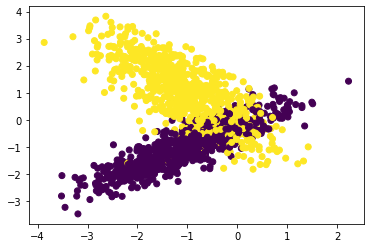

In [19]:
plt.scatter(X[:, 0], X[:, 1], c= y)

In [21]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))

In [22]:
X_new.shape

(1500, 3)

In [23]:
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

def predict(X, weight):
  y_hat = sigmoid(np.dot(X, weight))
  return y_hat

In [39]:
def logLoss(X,y,weight):
  y_hat = predict(X, weight)
  loss = ((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat)))
  return -loss.mean()

In [52]:
def gradient(X, y, weight):
  y_hat = predict(X, weight)
  grad = np.dot(X.T, (y_hat - y))
  return grad/len(X)

In [53]:
def gradient_descent(X, y, learning_rate = 0.1, epochs = 100):
  weight = np.random.rand(X.shape[1], 1)
  error_list = []
  for i in range(epochs):
    loss = logLoss(X, y, weight)
    error_list.append(loss)
    grad = gradient(X, y, weight)
    weight = weight - learning_rate * grad

  return weight.round(3), error_list

In [74]:
opt_weights_1, loss =  gradient_descent(X_new, y, epochs=200)

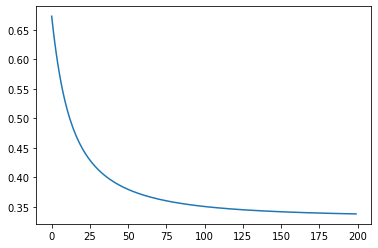

In [75]:
plt.plot(loss)

In [76]:
opt_weights_1

array([[0.227],
       [0.008],
       [1.864]])

In [77]:
Y_hat = predict(X_new, opt_weights_1)
Y_hat[:5]

array([[0.99368219],
       [0.07927295],
       [0.01319985],
       [0.93369   ],
       [0.06860088]])

In [78]:
predictions = Y_hat.round().astype('int')
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [79]:
(y==predictions).mean()*100

85.33333333333334

In [80]:
# Let's try by increasing learning_rate

opt_weights_2, loss =  gradient_descent(X_new, y, epochs=300, learning_rate = 0.5)

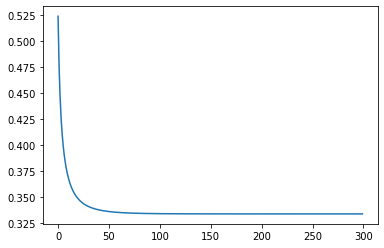

In [81]:
plt.plot(loss)

In [ ]:
loss

In [83]:
opt_weights_2

array([[ 0.218],
       [-0.156],
       [ 2.22 ]])

In [84]:
Y_hat = predict(X_new, opt_weights_2)
Y_hat[:5]

array([[0.99816354],
       [0.0621768 ],
       [0.00927194],
       [0.96420738],
       [0.04693951]])

In [85]:
predictions = Y_hat.round().astype('int')
predictions[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [86]:
y[:5]

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [87]:
# Let's check performance
(y==predictions).mean()*100

85.53333333333333